<h2 style = "text-align: center;color: #206bf7">A Notebook on Music by Tanja, Dzmitry, Goodness and Joachim, Project6, June 2022</h2>

In [8]:
import pandas as pd
df_sclust = pd.read_csv('df_audio_features_1000.csv', index_col=["name", "artist"])
df_sclust

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
Smoke Gets In Your Eyes,The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...
"What'd I Say, Pt. 1 & 2",Ray Charles,0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,NaN,307053,4,5yQ9iMZXGcr5rlO4hoLsP4,https://open.spotify.com/track/5yQ9iMZXGcr5rlO...
Dream A Little Dream Of Me,Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,NaN,185067,4,3vFVS2WYHDG4KkWCNecvpn,https://open.spotify.com/track/3vFVS2WYHDG4KkW...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,NaN,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,NaN,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,NaN,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...


In [9]:
df_sclust.shape

(1440, 16)

In [10]:
from sklearn.preprocessing import MinMaxScaler
my_min_max = MinMaxScaler(feature_range=(0,1))


In [11]:
df_sclust1 = df_sclust.drop(['id', 'html'], axis=1, inplace=False)
#df_sclust2 = df_sclust1.dropna
df_sclust1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1440 entries, ('All Shook Up', 'Elvis Presley') to ('Ravel: Boléro, M. 81', 'Maurice Ravel')
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1440 non-null   float64
 1   energy            1440 non-null   float64
 2   key               1440 non-null   int64  
 3   loudness          1440 non-null   float64
 4   mode              1440 non-null   int64  
 5   speechiness       1440 non-null   float64
 6   acousticness      1440 non-null   float64
 7   instrumentalness  1440 non-null   float64
 8   liveness          1440 non-null   float64
 9   valence           1440 non-null   float64
 10  tempo             1440 non-null   float64
 11  type              0 non-null      float64
 12  duration_ms       1440 non-null   int64  
 13  time_signature    1440 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 245.2+ KB


In [12]:
for i in df_sclust1.columns:
    print(df_sclust1[i].isnull().values.sum())

0
0
0
0
0
0
0
0
0
0
0
1440
0
0


In [14]:
df_sclust1.drop('type', inplace=True, axis=1)

In [15]:
my_min_max.fit(df_sclust1)

MinMaxScaler()

In [16]:
df_sclust1_scalled = my_min_max.transform(df_sclust1)

In [17]:
df_sclust1_scalled

array([[0.62406015, 0.46986871, 0.90909091, ..., 0.15610634, 0.01447418,
        0.75      ],
       [0.58093764, 0.24797664, 0.09090909, ..., 0.49456661, 0.04289922,
        0.75      ],
       [0.25475453, 0.22789591, 0.27272727, ..., 0.41238252, 0.02518899,
        0.75      ],
       ...,
       [0.        , 0.00091337, 0.81818182, ..., 0.13972316, 0.04674331,
        0.5       ],
       [0.08115878, 0.02086358, 0.36363636, ..., 0.11122178, 0.06702559,
        0.75      ],
       [0.32551968, 0.0488762 , 0.45454545, ..., 0.09213786, 0.23608371,
        0.5       ]])

In [18]:
a= pd.DataFrame(df_sclust1_scalled,
             index=df_sclust1.index,
             columns=df_sclust1.columns)

In [ ]:
a

In [21]:
from sklearn.cluster import KMeans

In [22]:
my_kmeans = KMeans(n_clusters= 4)

In [25]:
my_kmeans.fit(a)

KMeans(n_clusters=4)

In [27]:
clusters = my_kmeans.predict(a)

In [32]:
df_sclust1["cluster"] = clusters

In [33]:
df_sclust1

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4,2
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4,2
Smoke Gets In Your Eyes,The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4,0
"What'd I Say, Pt. 1 & 2",Ray Charles,0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4,2
Dream A Little Dream Of Me,Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4,0
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4,0
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3,0


In [65]:
b=df_sclust1.groupby(by="cluster").mean()


In [66]:
centroids = my_kmeans.cluster_centers_
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.297214,0.173075,0.439955,0.566346,1.000000e+00,0.037681,0.903512,0.441496,0.150940,0.198614,0.347724,0.086835,0.677469
1,0.337058,0.187088,0.502643,0.575705,7.771561e-16,0.040643,0.881520,0.543300,0.138817,0.213814,0.347305,0.087186,0.707849
2,0.637416,0.654670,0.444316,0.812805,1.000000e+00,0.148359,0.269778,0.038427,0.173462,0.619780,0.449370,0.046110,0.740491
3,0.660368,0.681143,0.528609,0.827327,1.221245e-15,0.164494,0.206390,0.047308,0.151031,0.586119,0.469033,0.049292,0.740415


In [63]:
def get_distances(b):
  return pd.DataFrame(pairwise_distances(b), index=b.index, columns=b.index)

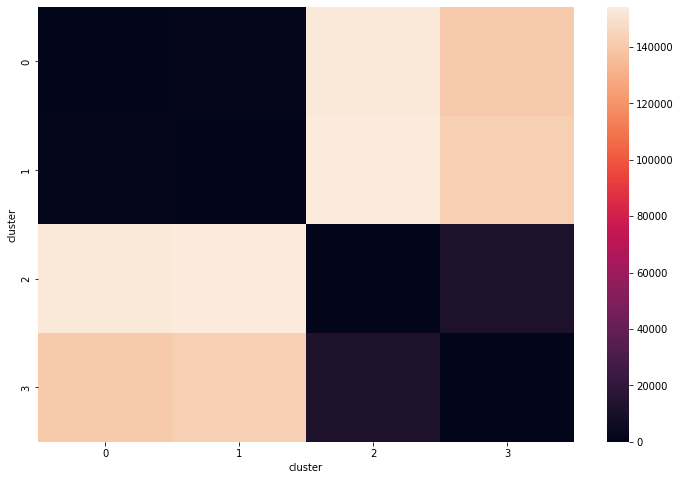

In [67]:
import seaborn as sns
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Euclidean (by default)
ecl_dis = pd.DataFrame(pairwise_distances(b), index=b.index, columns=b.index)
ecl_dis
plt.subplots(figsize=(12, 8))
sns.heatmap(ecl_dis)
plt.show()

In [73]:
df_sclust1.groupby(by="cluster").count()['key']

cluster
0    324
1    172
2    631
3    313
Name: key, dtype: int64